# Visualizing Labeled Fronts

This notebook demonstrates how to use **FrontTracker** to detect and visualize oceanic fronts in a real dataset.  

In this demo, we will: 
1. **Load gradient magnitude (GM) data** derived from a sea surface temperature (SST) field, along with latitude and longitude grids.  
2. **Apply a fixed threshold** (`treshold = 0.05`) to isolate regions of strong gradients likely associated with thermal fronts.  
3. **Identify and track fronts** using the `FrontTracker` class, which links structures across time steps.  
4. **Visualize detected fronts** on a global Mollweide projection by:  
   - *Scattering pixels* that belong to each front.  
   - *Annotating labels* at the mean location of each front.  
   - *Applying a length filter* (≥ 10 km) to focus on significant structures.  

This notebook provides a **practical example** of applying FrontTracker to geophysical data, from loading precomputed inputs to generating a cartographic visualization of detected fronts.  


In [1]:
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from fronttracker.core import FrontTracker

# -----------------------------------
# LOAD DATA
# -----------------------------------
gm = np.load(".../gm.npy")
latitude = np.load(".../latitude.npy")
longitude = np.load(".../longitude.npy")

# -----------------------------------
# FRONT THRESHOLD
# -----------------------------------
treshold = 0.05

In [2]:
# -----------------------------------
# FRONT IDENTIFICATION AND TRACKING
# -----------------------------------

# Initialize the front tracker
front_tracker = FrontTracker()

# Identify fronts in the GM field using the threshold defined earlier
front_tracker.identify_fronts(np.array(["2003-01-01"]), longitude, latitude, gm, treshold=treshold)

# Link fronts between consecutive time steps (temporal tracking)
front_tracker.track()

print("Fronts:", len(front_tracker.fronts))

Fronts: 400


Fronts: 134


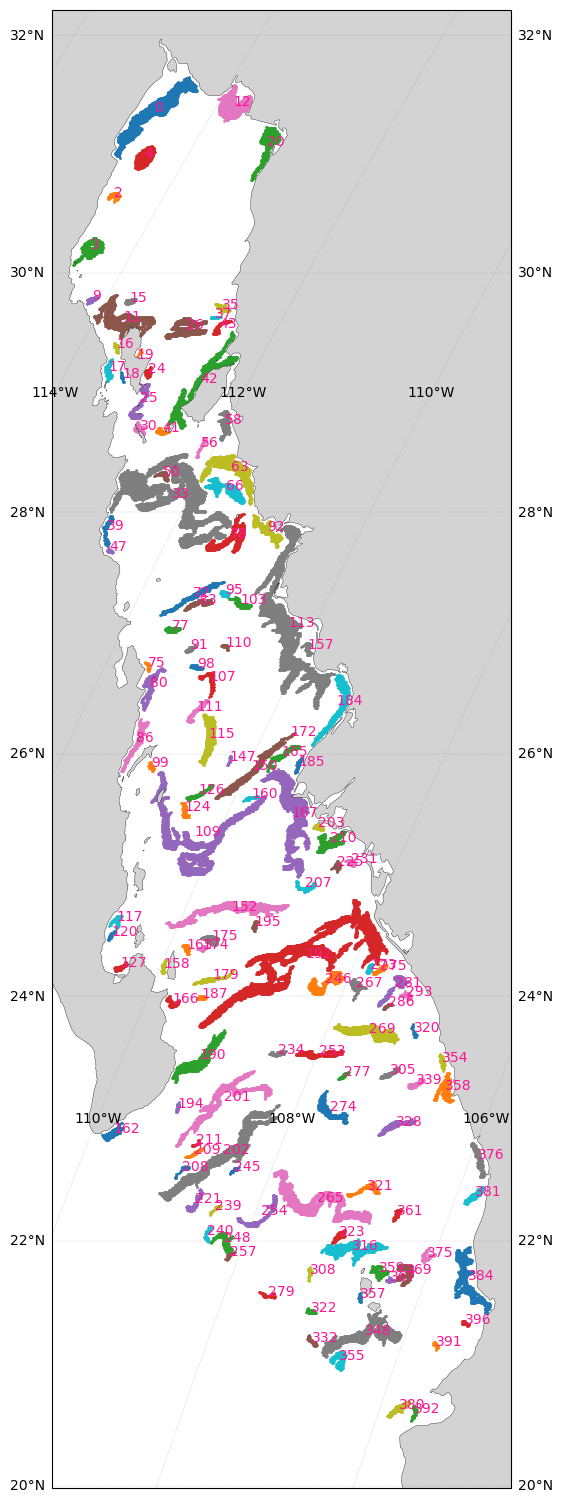

In [3]:
# -----------------------------------
# VISUALIZATION SETUP
# -----------------------------------

# Create a figure with Mollweide projection
fig = plt.figure(figsize=(4.8*2, 4.8*4))
ax = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Mollweide())

land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k', facecolor=cartopy.feature.COLORS['land'])
ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
gl = ax.gridlines(draw_labels=True, linewidth=0.25, color='gray', alpha=0.5, linestyle='--')

# Loop through all detected fronts
fronts = 0
for label in front_tracker.data_labels.labels:
    front = front_tracker.fronts[label]
    front.metrics()
    # Only plot fronts above a minimum length threshold (10 km)
    if front.length >= 10: 
        ax.scatter(front.longitude, front.latitude, s=1, transform=cartopy.crs.PlateCarree())
        ax.text(front.longitude.mean(), front.latitude.mean(), label, c="deeppink", transform=cartopy.crs.PlateCarree())
        fronts += 1

print("Fronts:", fronts)
plt.show()